In [1]:
import pandas as pd
'''
"In this healthcare project, our R&D company aims to mitigate the risk of cardiovascular disease (CVD) by leveraging anonymized data from multiple hospitals. 
We are utilizing a dataset containing personal and medical information to identify risk factors such as unhealthy diet, lack of physical activity, and mental illness. 
Our goal is to develop an accurate predictive model to assess a new patient's likelihood of developing heart disease, potentially saving lives through early intervention."
'''
df = pd.read_csv("heart_disease_prediction.csv")

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
print(f"Number of observations:{df.shape[0]}")
print(f"Number of features:{df.shape[1]}")

Number of observations:918
Number of features:12


In [12]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [13]:
# Use the describe() method to display descriptive statistics
statistics = df.describe()

# Print the descriptive statistics
print(statistics)


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [14]:
# Calculate the number of missing values in each column
missing_values = df.isna().sum()

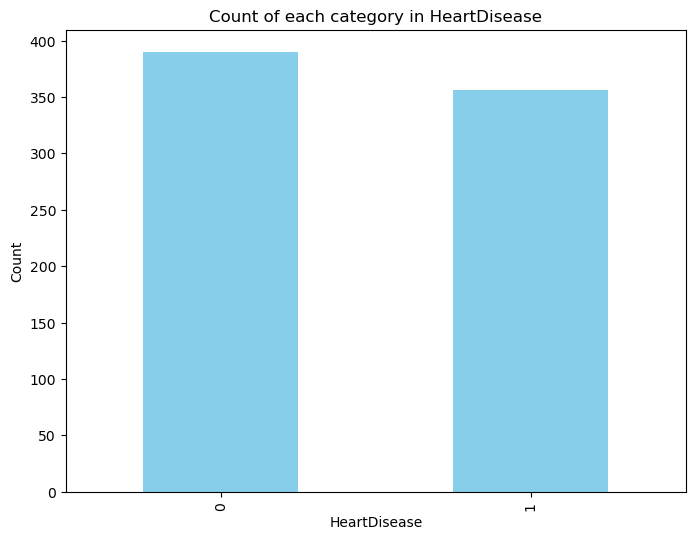

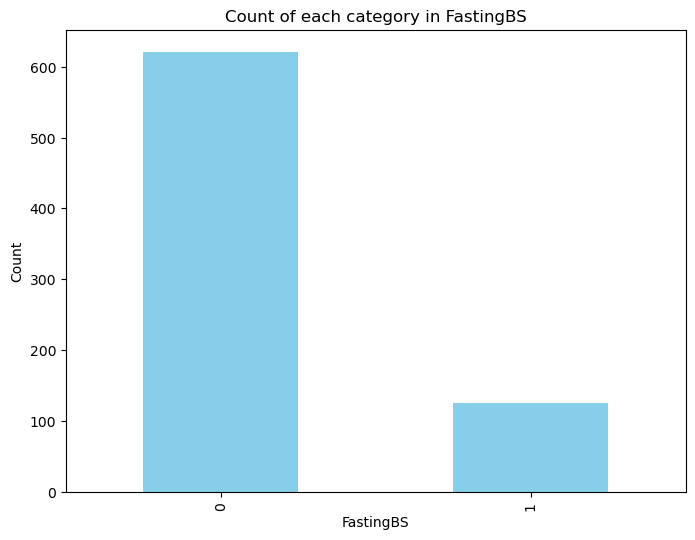

In [8]:
import matplotlib.pyplot as plt

# List of categorical columns to plot
categorical_columns = ['HeartDisease', 'FastingBS']

# Iterate through the categorical columns and create bar charts
for column in categorical_columns:
    # Create a bar chart
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of each category in {column}')
    
    # Show the plot
    plt.show()

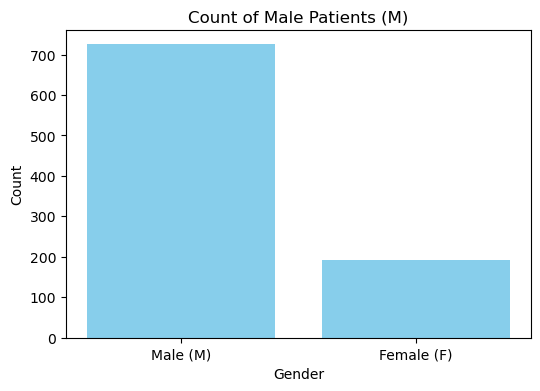

In [16]:
# Count the number of rows with the value 'M' in the 'Sex' column
count_males = (df['Sex'] == 'M').sum()
# Count the number of rows with the value 'F' in the 'Sex' column
count_female = (df['Sex'] == 'F').sum()

# Create a bar chart to display the count
plt.figure(figsize=(6, 4))
plt.bar(['Male (M)'], [count_males], color='skyblue')
plt.bar(['Female (F)'], [count_female], color='skyblue')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Male Patients (M)')

# Show the graph
plt.show()

<Figure size 800x600 with 0 Axes>

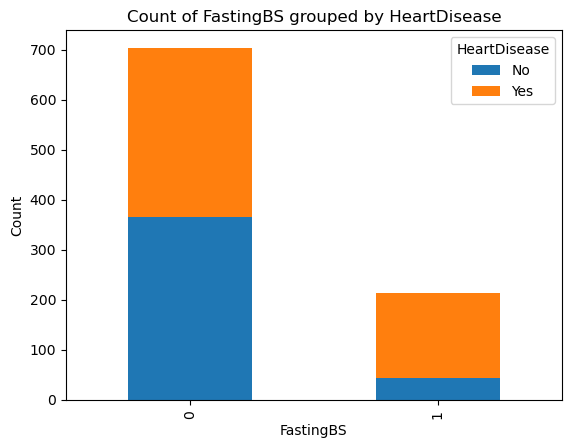

<Figure size 800x600 with 0 Axes>

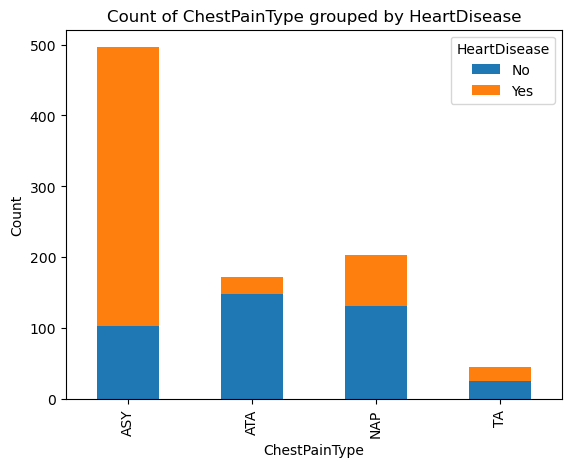

In [18]:
# List of categorical columns to plot
categorical_columns = ['FastingBS', 'ChestPainType']

# Iterate through the categorical columns and create bar charts grouped by 'HeartDisease'
for column in categorical_columns:
    # Create a bar chart with grouping
    plt.figure(figsize=(8, 6))
    grouped_data = df.groupby([column, 'HeartDisease']).size().unstack()
    grouped_data.plot(kind='bar', stacked=True)
    
    # Add labels, title, and legend
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of {column} grouped by HeartDisease')
    plt.legend(title='HeartDisease', labels=['No', 'Yes'])
    
    # Show the plot
    plt.show()

In [3]:
# Count the number of rows with RestingBP = 0
count_resting_bp_zero = (df['RestingBP'] == 0).sum()

# Count the number of rows with Cholesterol = 0
count_cholesterol_zero = (df['Cholesterol'] == 0).sum()

# Print the counts
print(f"Number of rows with RestingBP = 0: {count_resting_bp_zero}")
print(f"Number of rows with Cholesterol = 0: {count_cholesterol_zero}")

Number of rows with RestingBP = 0: 1
Number of rows with Cholesterol = 0: 172


In [4]:
# Remove rows with 0 values for 'RestingBP' and 'Cholesterol'
df = df[(df['RestingBP'] != 0) & (df['Cholesterol'] != 0)]

In [6]:
#  Feature Selection

# Convert categorical features into dummy variables


# Create dummies for all categorical vars 

heart_disease_clean = pd.get_dummies(df, drop_first = True)
heart_disease_clean.head()



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


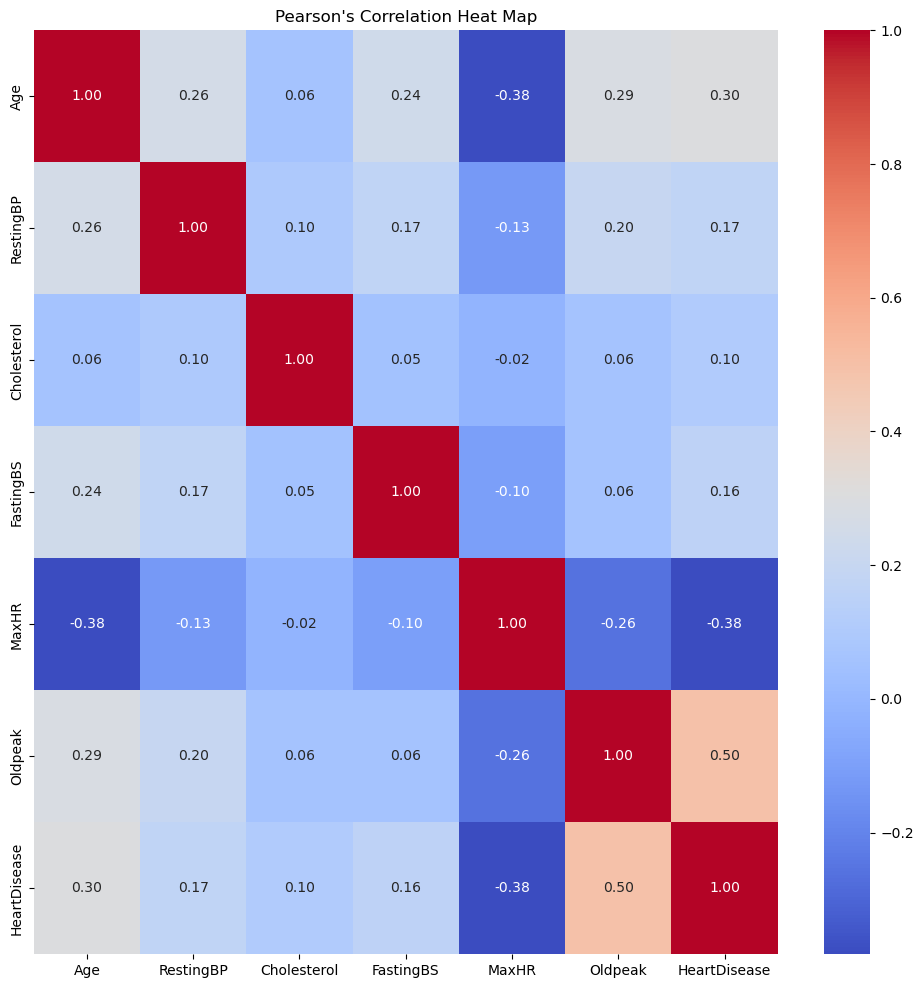

In [10]:
import seaborn as sns

# Compute the Pearson's correlation matrix
correlation_matrix = df.corr()

# Create a heat map
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Heat Map")

# Show the plot
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [13]:
X = heart_disease_clean.drop('HeartDisease', axis = 1)
y = heart_disease_clean['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [15]:
## Fit a KNN clf for each single feature

k = 5 # Arbitrary
selected_features = ["Oldpeak","MaxHR","ChestPainType_ATA","Sex_M","ExerciseAngina_Y","ST_Slope_Flat","ST_Slope_Up"]
for feature in selected_features:
    
    X_train_single_feature = X_train[feature].to_numpy().reshape(-1, 1) ## Need 2d array even for single feature!
    X_val_single_feature = X_val[feature].to_numpy().reshape(-1, 1)
    
#     X_train_single_feature = X_train[[feature]]  ## Returns dataframe even for a single col
#     X_val_single_feature = X_val[[feature]]
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_single_feature, y_train)
    
    print('For a KNN based on {} nearest neighbors, the accuracy using {} as feature is {:.2%}.'.format(
        k, feature, knn.score(X_val_single_feature, y_val)))

For a KNN based on 5 nearest neighbors, the accuracy using Oldpeak as feature is 76.00%.
For a KNN based on 5 nearest neighbors, the accuracy using MaxHR as feature is 64.00%.
For a KNN based on 5 nearest neighbors, the accuracy using ChestPainType_ATA as feature is 47.33%.
For a KNN based on 5 nearest neighbors, the accuracy using Sex_M as feature is 62.00%.
For a KNN based on 5 nearest neighbors, the accuracy using ExerciseAngina_Y as feature is 80.67%.
For a KNN based on 5 nearest neighbors, the accuracy using ST_Slope_Flat as feature is 80.67%.
For a KNN based on 5 nearest neighbors, the accuracy using ST_Slope_Up as feature is 82.00%.


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Prepare the training data for scaling
X_train_multiple_features = X_train[selected_features]  # Select specific features for training
X_train_scaled = scaler.fit_transform(X_train_multiple_features)  # Fit and transform the training data

# Prepare the validation (or test) data for scaling
X_val_multiple_features = X_val[selected_features]  # Select the same features for validation (or test)
X_val_scaled = scaler.transform(X_val_multiple_features)  # Use the same scaler to transform the validation (or test) data

In [17]:
# Set the value of 'k' for the K-Nearest Neighbors (KNN) classifier
k = 5

# Initialize the KNN classifier with the chosen 'k' value
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN classifier using the scaled training data
knn.fit(X_train_scaled, y_train)

# Print the accuracy of the KNN model on the validation data
print('For a KNN model based on {} nearest neighbors, the accuracy using {} as features is {:.2%}.'.format(
        k, selected_features, knn.score(X_val_scaled, y_val)))

For a KNN model based on 5 nearest neighbors, the accuracy using ['Oldpeak', 'MaxHR', 'ChestPainType_ATA', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'] as features is 84.00%.


In [18]:
#Hyperparameter Tuning 

X = heart_disease_clean.drop('HeartDisease', axis = 1)
y = heart_disease_clean['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)



scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])


from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': list(range(1,11,1)),
    'weights': ['uniform','distance'],
    'metric': ['minkowski', 'manhattan'],
    'p':[1,2,3]
}

knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [19]:


best_estimator = knn_grid_search.best_estimator_
best_score = knn_grid_search.best_score_
best_params = knn_grid_search.best_params_

print('The best estimator had a accuracy score of {:.2%}, based on the following parameters :{}.'.format(
best_score, best_params))



The best estimator had a accuracy score of 85.74%, based on the following parameters :{'metric': 'minkowski', 'n_neighbors': 9, 'p': 3, 'weights': 'uniform'}.


<AxesSubplot:>

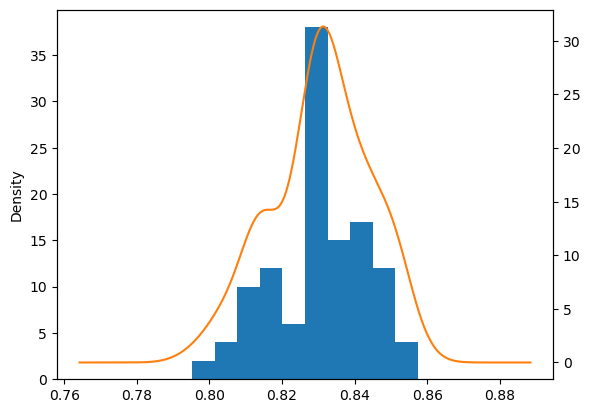

In [20]:


%matplotlib inline
scores = pd.Series(knn_grid_search.cv_results_['mean_test_score'])
scores.plot.hist()
scores.plot.kde(secondary_y = True)

